In [2]:
!pip install git+https://github.com/jacksonpradolima/pyneurgen.git@master

  Cloning https://github.com/jacksonpradolima/pyneurgen.git (to revision master) to /tmp/pip-req-build-xxhcxgp1
  Running command git clone -q https://github.com/jacksonpradolima/pyneurgen.git /tmp/pip-req-build-xxhcxgp1
  Created wheel for pyneurgen: filename=pyneurgen-0.3.1-py3-none-any.whl size=55967 sha256=9bca968e3ea91cf99c9416722bd2bc7e98650bc68e1dfc7548222a1dce09aa5e
  Stored in directory: /tmp/pip-ephem-wheel-cache-sf70f706/wheels/6f/73/62/f5e7fdf82be8500fd60bf6d367f1f4270680ac7af185265add
Successfully built pyneurgen


In [4]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
from pyneurgen.recurrent import NARXRecurrent
from pyneurgen.neuralnet import NeuralNet
from pyneurgen.nodes import BiasNode, Connection

%matplotlib inline

In [5]:
#df = pd.read_excel("Forest_tempWithoutAnomalies.xlsx") #load data set
#len_df = len(df)

our1 = pd.read_excel("dataset.xlsx")
our2 = pd.read_excel("meteo.xlsx")
df = pd.merge(our1, our2, on='Temps')
len_df = len(df)

#inpt = df[["Temps","T8_2","Temperature exterieure"]]
inpt = df[["Temps","T1_2","Temperature exterieure","T1_1","T2_2","Pression"]]
output = df[["T1_1"]]

sc = StandardScaler()
in1 = sc.fit_transform(inpt[0:int(len_df * .8)]) #train and fit train input data
in2 = sc.transform(inpt[int(len_df * .8)+1:len_df-1]) #test transform 
inp = np.concatenate([in1,in2]) #add to the end df1 arr df2
inpt = pd.DataFrame(inp, columns=inpt.columns)

out1 = sc.fit_transform(output[0:int(len_df * .8)]) #train and fit train out data
out2 = sc.transform(output[int(len_df * .8)+1:len_df-1]) #test transform 
out = np.concatenate([out1,out2]) #add to the end df1 arr df2
output = pd.DataFrame(out, columns=output.columns)


In [6]:
all_inputs = inpt.values
all_targets = output.values
for val in all_targets:
    val = [val]
type(all_targets)

numpy.ndarray

In [7]:
input_nodes = 6
hidden_nodes = 3
output_nodes = 1

output_order = 9
incoming_weight_from_output = .6
input_order = 2
incoming_weight_from_input = .4 
net = NeuralNet()

net.init_layers(input_nodes, [hidden_nodes], output_nodes,
        NARXRecurrent(
            output_order,
            incoming_weight_from_output,
            input_order,
            incoming_weight_from_input))

net.randomize_network() #This function randomizes the weights in all of the connections.

In [8]:
net.set_halt_on_extremes(True)#This function sets the flag as to whether 
#the program should halt when experiencing extremely positive or negative numbers. 
#This can happen when using linear functions and data that may not be normalized.

#   Set to constrain beginning weights to -.5 to .5
net.set_random_constraint(.5)
net.set_learnrate(.1)#This function sets the learn rate for the modeling. 
#It is used to determine how much weight to associate with an error when learning.

#the inputs and targets are loaded into the system
net.set_all_inputs(all_inputs)
net.set_all_targets(all_targets)

length = len(all_inputs)
learn_end_point = int(length * .8)#The first 80% of the data will be used for learning

net.set_learn_range(0, learn_end_point)#This function sets the range within the data that is to used for learning.
net.set_test_range(learn_end_point + 1, length - 1)

net.layers[1].set_activation_type('sigmoid')#sigmoid,linear TF

net.learn(epochs= 30, show_epoch_results=True, 
    random_testing=False)

epoch: 0 MSE: 0.016873011683491205
epoch: 1 MSE: 0.005798480851506207
epoch: 2 MSE: 0.0034463481512825096
epoch: 3 MSE: 0.0024453952299805996
epoch: 4 MSE: 0.0020091175831915306
epoch: 5 MSE: 0.0017553062873796005
epoch: 6 MSE: 0.001564400240421069
epoch: 7 MSE: 0.0013980336677647792
epoch: 8 MSE: 0.0012506495259516509
epoch: 9 MSE: 0.001124046667820699
epoch: 10 MSE: 0.0010190690564492475
epoch: 11 MSE: 0.0009340293219137968
epoch: 12 MSE: 0.0008655801316561418
epoch: 13 MSE: 0.0008099726445427018
epoch: 14 MSE: 0.0007639892792578597
epoch: 15 MSE: 0.000725255439658631
epoch: 16 MSE: 0.0006919932752023233
epoch: 17 MSE: 0.0006627478914813381
epoch: 18 MSE: 0.00063635232505131
epoch: 19 MSE: 0.0006119542127927839
epoch: 20 MSE: 0.000588969263797127
epoch: 21 MSE: 0.0005669964777485755
epoch: 22 MSE: 0.0005457519919567025
epoch: 23 MSE: 0.0005250356817459961
epoch: 24 MSE: 0.000504719114455617
epoch: 25 MSE: 0.0004847405903403158
epoch: 26 MSE: 0.00046509832684628636
epoch: 27 MSE: 0.00

In [9]:
mse = net.test()#With learning complete, it is time to test and evaluate the results.
print ("mse = ", mse)
#test_positions = [item[0][1] for item in net.get_test_data()]
test_positions = [item[0][0] for item in net.get_test_data()] 
all_targets1 = [item[0][0] for item in net.test_targets_activations]
allactuals = [item[1][0] for item in net.test_targets_activations]
#test_positions
#all_targets1

mse =  0.08469224440081574


574

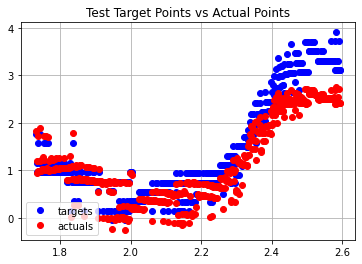

In [10]:
from pylab import plot, legend, subplot, grid, xlabel, ylabel, show, title
#subplot(3, 1, 2)
plot(test_positions, all_targets1, 'bo', label='targets')
plot(test_positions, allactuals, 'ro', label='actuals')
grid(True)
legend(loc='lower left', numpoints=1)
title("Test Target Points vs Actual Points")
len(allactuals)